### 광고에 소요되는 비용으로 클릭수 예측하기

In [1]:
# %autosave 0 
import warnings
warnings.filterwarnings(action='ignore') 

import numpy as np
import tensorflow as tf

from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 파일 로딩
from tensorflow.keras.layers import Dense       # 전결합층
from tensorflow.keras.optimizers import Adam    # 가중치, bias 최적화
from tensorflow.keras.utils import plot_model   # 네트워크 입출력 시각화

import matplotlib.pyplot as plt
import matplotlib
from matplotlib import rc
rc('font', family='Malgun Gothic')

# print(tf.__version__)

In [8]:
data=np.loadtxt('./data/click.csv', skiprows=1, delimiter=',',
                dtype=np.float64)
print(type(data))
print(data.shape)
print(data)

<class 'numpy.ndarray'>
(20, 2)
[[235. 591.]
 [216. 539.]
 [148. 413.]
 [ 35. 310.]
 [ 85. 308.]
 [204. 519.]
 [ 49. 325.]
 [ 25. 332.]
 [173. 498.]
 [191. 498.]
 [134. 392.]
 [ 99. 334.]
 [117. 385.]
 [112. 387.]
 [162. 425.]
 [272. 659.]
 [159. 400.]
 [159. 427.]
 [ 59. 319.]
 [198. 522.]]


In [9]:
x_train = data[:, 0]
print(x_train)

[235. 216. 148.  35.  85. 204.  49.  25. 173. 191. 134.  99. 117. 112.
 162. 272. 159. 159.  59. 198.]


In [10]:
y_train = data[:, 1]
print(y_train)

[591. 539. 413. 310. 308. 519. 325. 332. 498. 498. 392. 334. 385. 387.
 425. 659. 400. 427. 319. 522.]


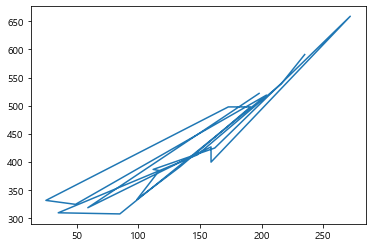

In [11]:
plt.plot(x_train, y_train)
plt.show()

In [12]:
data[:,0]

array([235., 216., 148.,  35.,  85., 204.,  49.,  25., 173., 191., 134.,
        99., 117., 112., 162., 272., 159., 159.,  59., 198.])

In [20]:
idx = data[:,0].argsort() # 원본 데이터의 값이 정렬이 된 값의 index, 0~ 
idx

array([ 7,  3,  6, 18,  4, 11, 13, 12, 10,  2, 17, 16, 14,  8,  9, 19,  5,
        1,  0, 15], dtype=int64)

In [21]:
print(data[7, :]) # 원본 데이터 index 7임으로 8번째 값
print(data[3, :]) # 원본 데이터 index 3임으로 4번째 값
print(data[6, :]) # 원본 데이터 index 6임으로 7번째 값
print(data)

[ 25. 332.]
[ 35. 310.]
[ 49. 325.]
[[235. 591.]
 [216. 539.]
 [148. 413.]
 [ 35. 310.]
 [ 85. 308.]
 [204. 519.]
 [ 49. 325.]
 [ 25. 332.]
 [173. 498.]
 [191. 498.]
 [134. 392.]
 [ 99. 334.]
 [117. 385.]
 [112. 387.]
 [162. 425.]
 [272. 659.]
 [159. 400.]
 [159. 427.]
 [ 59. 319.]
 [198. 522.]]


In [14]:
data[idx]

array([[ 25., 332.],
       [ 35., 310.],
       [ 49., 325.],
       [ 59., 319.],
       [ 85., 308.],
       [ 99., 334.],
       [112., 387.],
       [117., 385.],
       [134., 392.],
       [148., 413.],
       [159., 427.],
       [159., 400.],
       [162., 425.],
       [173., 498.],
       [191., 498.],
       [198., 522.],
       [204., 519.],
       [216., 539.],
       [235., 591.],
       [272., 659.]])

In [22]:
data[idx][::-1] # 내림 차순 정렬

array([[272., 659.],
       [235., 591.],
       [216., 539.],
       [204., 519.],
       [198., 522.],
       [191., 498.],
       [173., 498.],
       [162., 425.],
       [159., 400.],
       [159., 427.],
       [148., 413.],
       [134., 392.],
       [117., 385.],
       [112., 387.],
       [ 99., 334.],
       [ 85., 308.],
       [ 59., 319.],
       [ 49., 325.],
       [ 35., 310.],
       [ 25., 332.]])

In [23]:
ds = data[idx]
ds

array([[ 25., 332.],
       [ 35., 310.],
       [ 49., 325.],
       [ 59., 319.],
       [ 85., 308.],
       [ 99., 334.],
       [112., 387.],
       [117., 385.],
       [134., 392.],
       [148., 413.],
       [159., 427.],
       [159., 400.],
       [162., 425.],
       [173., 498.],
       [191., 498.],
       [198., 522.],
       [204., 519.],
       [216., 539.],
       [235., 591.],
       [272., 659.]])

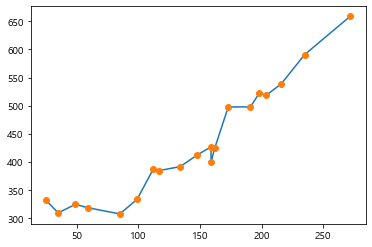

In [24]:
x_train = ds[:, 0]
y_train = ds[:, 1]
plt.plot(x_train, y_train)
plt.plot(x_train, y_train, 'o')
plt.show()

In [27]:
model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear'))
model.compile(optimizer='adam', loss='mse')
model.summary()
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs=200, batch_size=1)

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/200
16/16 [==============================] - 0s 12ms/step - loss: 127887.3580 - val_loss: 223192.3438
Epoch 2/200
16/16 [==============================] - 0s 4ms/step - loss: 117279.4563 - val_loss: 220148.6875
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 109860.6112 - val_loss: 217160.2500
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 127294.8442 - val_loss: 214103.6250
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 106643.3415 - val_loss: 211166.4219
Epoch 6/200
16/16 [==============================] - 0s 4ms/step - loss: 116446.2142 - val_loss: 208105.3750

Epoch 72/200
16/16 [==============================] - 0s 4ms/step - loss: 49805.0728 - val_loss: 68106.3750
Epoch 73/200
16/16 [==============================] - 0s 4ms/step - loss: 49644.3548 - val_loss: 66708.3281
Epoch 74/200
16/16 [==============================] - 0s 4ms/step - loss: 51507.7477 - val_loss: 65355.5078
Epoch 75/200
16/16 [==============================] - 0s 4ms/step - loss: 51854.6818 - val_loss: 63985.2539
Epoch 76/200
16/16 [==============================] - 0s 4ms/step - loss: 51742.4922 - val_loss: 62690.5234
Epoch 77/200
16/16 [==============================] - 0s 4ms/step - loss: 48881.4639 - val_loss: 61374.4414
Epoch 78/200
16/16 [==============================] - 0s 4ms/step - loss: 49501.8504 - val_loss: 59996.2070
Epoch 79/200
16/16 [==============================] - 0s 3ms/step - loss: 45299.4154 - val_loss: 58725.4844
Epoch 80/200
16/16 [==============================] - 0s 4ms/step - loss: 47828.2038 - val_loss: 57520.6367
Epoch 81/200
16/16 [========

16/16 [==============================] - 0s 4ms/step - loss: 22418.8740 - val_loss: 6984.7734
Epoch 148/200
16/16 [==============================] - 0s 4ms/step - loss: 25027.3932 - val_loss: 6653.6392
Epoch 149/200
16/16 [==============================] - 0s 4ms/step - loss: 28439.6023 - val_loss: 6332.5479
Epoch 150/200
16/16 [==============================] - 0s 4ms/step - loss: 14309.3547 - val_loss: 6021.4268
Epoch 151/200
16/16 [==============================] - 0s 4ms/step - loss: 30560.1017 - val_loss: 5721.4678
Epoch 152/200
16/16 [==============================] - 0s 4ms/step - loss: 21259.3685 - val_loss: 5424.4985
Epoch 153/200
16/16 [==============================] - 0s 4ms/step - loss: 24638.5776 - val_loss: 5141.8457
Epoch 154/200
16/16 [==============================] - 0s 4ms/step - loss: 19440.9968 - val_loss: 4858.5068
Epoch 155/200
16/16 [==============================] - 0s 4ms/step - loss: 21050.5674 - val_loss: 4597.0181
Epoch 156/200
16/16 [=====================

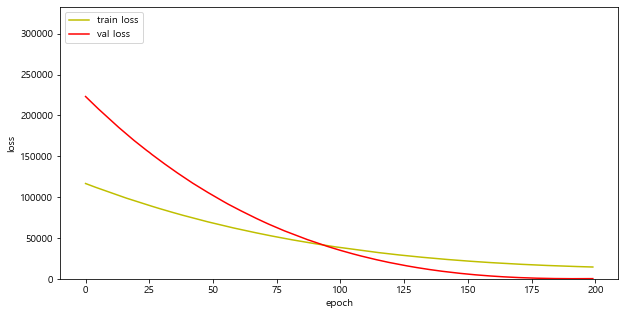

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 332796.5625]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.

In [29]:
# 테스트 데이터 준비, 훈련/검증에 사용하지 않은 데이터
x = np.array([50, 120, 140, 160, 250])
print(x.shape)

(5,)


In [33]:
p=model.predict(x) # 모델 사용
print(p.shape)
print(p)

(5, 1)
[[128.24226]
 [304.32135]
 [354.62967]
 [404.93796]
 [631.3254 ]]


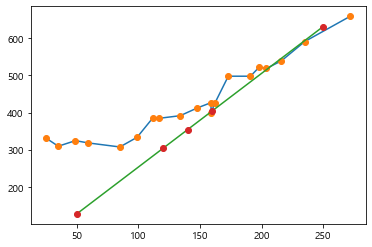

In [34]:
x_train = ds[:, 0]
y_train = ds[:, 1]
plt.plot(x_train, y_train)
plt.plot(x_train, y_train, 'o')
plt.plot(x, p)
plt.plot(x, p, 'o')
plt.show()

In [35]:
# 변수 1개를 가지고 매출액을 판단하는 것은 매우 특성이 부족함을 알 수 있다.
# 예) 자율 학습 시간 -> 성적
# 예) 자율 학습 시간 + 학원 + 온라인 강의 + 도서 구입 권수 -> 성적

In [36]:
model.save('./data/Click.h5')

In [37]:
model = load_model('./data/Click.h5')

In [39]:
pay = int(input('광고비를 입력하세요.'))
x = np.array([pay])
p=model.predict(x)
print(p)

광고비를 입력하세요.200
[[505.5546]]
